<a href="https://colab.research.google.com/github/astrasourav/Deep-Learning-/blob/master/Churn_Modelling(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uploading file and importing libraries

In [0]:
from google.colab import files

files.upload()

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Data analysis and data preprocessing

In [0]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [29]:
data.head()
# data.info()
# data.isnull().sum()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
# Dividing data into dependent & independent set

X = data.iloc[:, 3: 13].values
y = data.iloc[:, -1].values

In [48]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [0]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

lb_1 = LabelEncoder()
X[:, 2] = lb_1.fit_transform(X[:, 2])


In [0]:
# One-hot Encoding Geography column

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [0]:
# Creating training & testing set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [0]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Building our Model

In [58]:
model = tf.keras.models.Sequential([
                                keras.layers.Dense(10, activation='relu', input_shape=(12,)),
                                keras.layers.Dense(10, activation='relu'),
                                keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Compiling & Training the data

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=80, epochs=100)

Epoch 1/100
100/100 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.7545
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4855 - accuracy: 0.8035
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.8086
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.8139
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8161
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8186
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8211
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8236
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8267
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4054 - accura

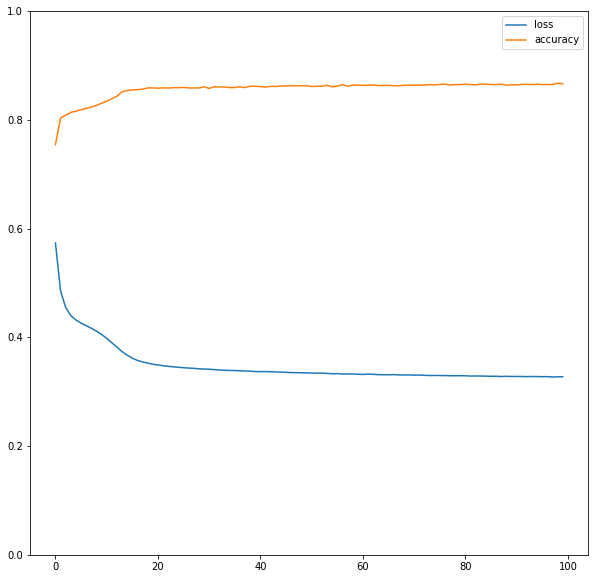

In [60]:
# plotting the graph

pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

In [61]:
# Evaluating the model

loss_val, acc_val = model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 971us/step - loss: 0.3358 - accuracy: 0.8645


# Predecting values

In [68]:
pred = model.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))
if(pred > 0.5):
  print ('True')
else:
  print('False')

False
